<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Box Office Revenue Analysis</Center>

<img src="box.jfif" width="2000px"></img>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns

# Data Loading

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# Shape Of Data

In [3]:
data.shape

(3000, 23)

<Font color="gray">- 3000 rows
</Font><br/>
<Font color="gray">- 23 columns
</Font>

# Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

# Null Values

In [5]:
print(data.isnull().values.any())
print(data.isnull().sum())

True
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


<Font color="gray">- There are no Null values
</Font>

# Describe

In [6]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


# Droping All Columns Having Values In Dictionary Format

In [7]:
data = data.drop(['belongs_to_collection', 'genres', 
                  'crew', 'cast', 'Keywords', 
                  'spoken_languages', 'production_companies', 
                  'production_countries', 'tagline','overview',
                  'homepage'] , axis=1)
data.head()

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue
0,1,14000000,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651
1,2,40000000,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435
2,3,3300000,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,105.0,Released,Whiplash,13092000
3,4,1200000,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,122.0,Released,Kahaani,16000000
4,5,0,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,118.0,Released,Marine Boy,3923970


# Creating new columns release_day , release_month , release_year ,  release_weekday

In [8]:
pd.to_datetime(data["release_date"])

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [9]:
data["release_date"] =  pd.to_datetime(data["release_date"])
data["release_day"] = data["release_date"].apply(lambda x:x.day)
data["release_month"] = data["release_date"].apply(lambda x:x.month)
data["release_weekday"] = data["release_date"].apply(lambda x:x.weekday())
data["release_year"] = data["release_date"].apply(lambda x:x.year if x.year<2022 else x.year - 100)
data.head()

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_month,release_weekday,release_year
0,1,14000000,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,Hot Tub Time Machine 2,12314651,20,2,4,2015
1,2,40000000,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,6,8,4,2004
2,3,3300000,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,2014-10-10,105.0,Released,Whiplash,13092000,10,10,4,2014
3,4,1200000,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,2012-03-09,122.0,Released,Kahaani,16000000,9,3,4,2012
4,5,0,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2009-02-05,118.0,Released,Marine Boy,3923970,5,2,3,2009


# Max Revenue Movie

In [10]:
data[data["revenue"] == data["revenue"].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_month,release_weekday,release_year
1126,1127,220000000,tt0848228,en,The Avengers,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,2012-04-25,143.0,Released,The Avengers,1519557910,25,4,2,2012


# Min Revenue Movie

In [11]:
data[data["revenue"] == data["revenue"].min()][["id","original_title","revenue"]]

,id,original_title,revenue
347,348,The Wind in the Willows,1
1754,1755,Mute Witness,1
1874,1875,Vermist,1
1917,1918,The Merry Widow,1


# Top Revenue Gradiant

In [12]:
data[["id","title","budget","revenue"]].sort_values(by="revenue" , ascending=False).head(10).style.background_gradient(subset="revenue",cmap="BuGn")

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


# Max Budget Movie

In [13]:
data[data["budget"] == data["budget"].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_month,release_weekday,release_year
2135,2136,380000000,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,2011-05-14,136.0,Released,Pirates of the Caribbean: On Stranger Tides,1045713802,14,5,5,2011


# Budget and Revenue Gradient

In [14]:
data[["id","title","budget","revenue"]].sort_values(by="budget" , ascending=False).head(10).style.background_gradient(subset=["revenue" , "budget"],cmap="PuBu")

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


# Max RunTime Movie

In [15]:
data[data["runtime"] == data["runtime"].max()][["original_title"]]

,original_title
1211,Carlos


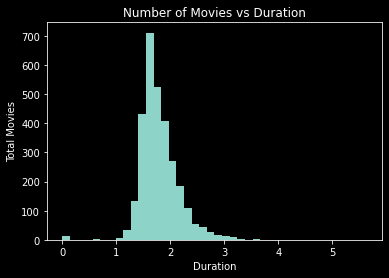

In [16]:
plt.hist(data["runtime"].fillna(0)/60 , bins=40)
plt.title("Number of Movies vs Duration")
plt.xlabel("Duration")
plt.ylabel("Total Movies")
plt.show()

# Budget , Revenue , Runtime Gradient

In [17]:
data[["id" ,"title","runtime","budget","revenue"]].sort_values(by=["runtime","budget","revenue"] , ascending=False).head(10).style.background_gradient(subset =['runtime' , 'budget' , 'revenue'] , cmap='PuBu')

,id,title,runtime,budget,revenue
1211,1212,Carlos,338.000000,18000000,871279
1922,1923,Cleopatra,248.000000,31115000,71000000
523,524,The Ten Commandments,220.000000,13000000,122700000
1302,1303,Heaven's Gate,219.000000,44000000,3484331
1914,1915,Gods and Generals,214.000000,56000000,12923936
2353,2354,Jodhaa Akbar,213.000000,8376800,13000000
625,626,Ben-Hur,212.000000,15000000,146900000
1975,1976,Chapiteau-Show,207.000000,2000000,393816
1731,1732,Hey Ram,199.000000,3900000,4900000
2120,2121,Spartacus,197.000000,12000000,60000000


# Year in which most movies is released

Text(0, 0.5, 'Total Movies')

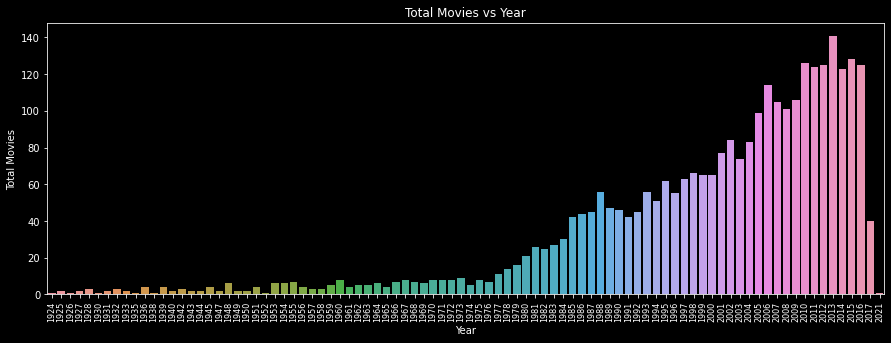

In [18]:
plt.figure(figsize= (15 , 5))
sns.countplot(x = data["release_year"].sort_values(ascending = True))
plt.title("Total Movies vs Year")
plt.xlabel("Year")
plt.xticks(rotation = 90 , fontsize=8)
plt.ylabel("Total Movies")

In [19]:
data["release_year"].value_counts().head()

2013    141
2015    128
2010    126
2012    125
2016    125
Name: release_year, dtype: int64

##### In 2013 141 movies were released

# Movie with highest popularity

In [20]:
data[data["popularity"] == data["popularity"].max()][["id","original_title" ,"popularity"]]

,id,original_title,popularity
518,519,Wonder Woman,294.337037


# Movie with min popularity

In [21]:
data[data["popularity"] == data["popularity"].min()][["id","original_title" ,"popularity"]]

,id,original_title,popularity
2556,2557,Big Time,0.000001


# Popularity Distribution Plot

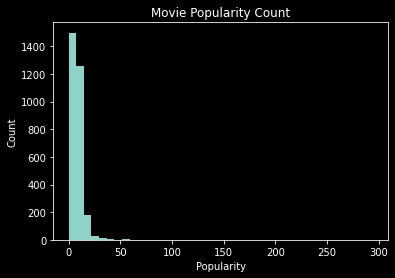

In [22]:
plt.hist(data["popularity"] , bins=40)
plt.title("Movie Popularity Count")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [23]:
data[data["popularity"] == data["popularity"].max()][["id","original_title","popularity"]]

,id,original_title,popularity
518,519,Wonder Woman,294.337037


##### Wonder Woman is the movie with highest popularity

In [24]:
data[data["popularity"] == data["popularity"].min()][["id","original_title","popularity"]]

,id,original_title,popularity
2556,2557,Big Time,0.000001


##### Big Time is the movie with min popularity

# Movies Count Per Mounth

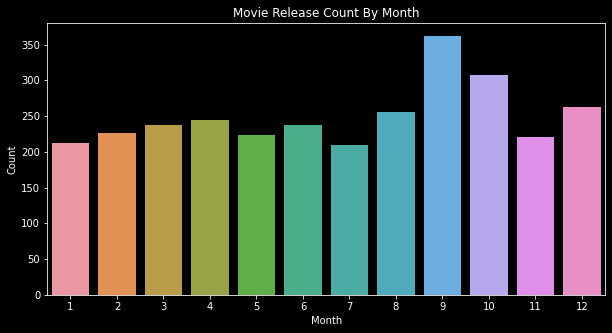

In [25]:
plt.figure(figsize = (10 , 5))
sns.countplot(x = data["release_month"].sort_values())
plt.title("Movie Release Count By Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [26]:
data["release_month"].value_counts()

9     362
10    307
12    263
8     256
4     245
3     238
6     237
2     226
5     224
11    221
1     212
7     209
Name: release_month, dtype: int64

In [27]:
data["release_month"].value_counts().max()

362

##### In september most movies were released

# Movies Count Per Date

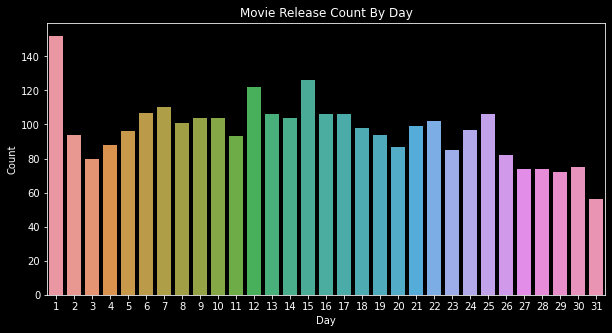

In [28]:
plt.figure(figsize = (10 , 5))
sns.countplot(x = data["release_day"].sort_values())
plt.title("Movie Release Count By Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

In [29]:
data["release_day"].value_counts().max()

152

#### on the 1st day 152 movies were released which is in maximum number

# Movie Count Per Week

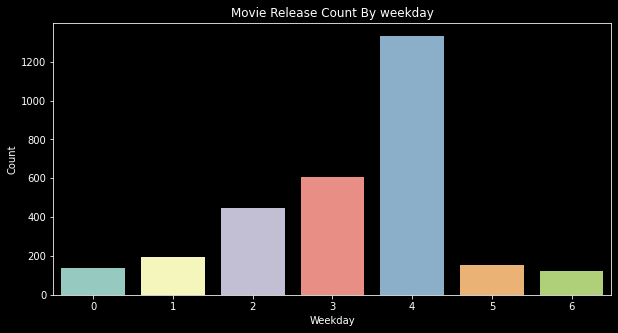

In [30]:
plt.figure(figsize = (10 , 5))
sns.countplot(x = data["release_weekday"].sort_values())
plt.title("Movie Release Count By weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

In [31]:
data["release_weekday"].value_counts()

4    1333
3     609
2     449
1     196
5     156
0     136
6     121
Name: release_weekday, dtype: int64

#### Highest Movies Were Released On Friday

<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Made By : Abhay Bisht</Center>